In [ ]:
Define a set of patterns for extracting time patterns from text

In [ ]:
!pip install numpy
!pip install pandas

In [ ]:
# Make sure KatherineJohnson.txt and MaryJackson.txt are in the working directory. 
import os

def read_file(file_name):
  with open(file_name, "r") as f:
    return f.read()

working_dir = os.getcwd()  # get our working directory
text_katherine = read_file(os.path.join(working_dir, 'KatherineJohnson.txt'))
print(text_katherine)


Katherine Johnson
From Wikipedia, the free encyclopedia

Creola Katherine Johnson (née Coleman; August 26, 1918 – February 24, 2020) was an American mathematician whose calculations of orbital mechanics as a NASA employee were critical to the success of the first and subsequent U.S. crewed spaceflights.[1] During her 33-year career at NASA and its predecessor, she earned a reputation for mastering complex manual calculations and helped pioneer the use of computers to perform the tasks.

Early life
Katherine Johnson was born as Creola Katherine Coleman on August 26, 1918, in White Sulphur Springs, West Virginia, to Joylette Roberta (née Lowe) and Joshua McKinley Coleman.[5][6][7][8] She was the youngest of four children.[9] Her mother was a teacher and her father was a lumberman, farmer, and handyman, and worked at the Greenbrier Hotel.[6][10]

External video
video icon Interview with West Virginia State University President Anthony Jenkins on Johnson's studies and career, October 21, 2

Observation of date patterns:

Expression of full date: "Month Day, Year", in which Month is expressed by letters (i.e January), Day is expressed by numbers without leading zeros, Year is expressed by 4 letters. For example, "October 21, 2019"

Expression of Year only: 4 digits only, eg: "1969"

#### Task 2: Implement the function *sentence_tokenize_text* so that it splits a text into a list of sentences. 

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def sentence_tokenize_text(text):
  """
  :param text: An input text, i.e. a string
  :return: A list of strings, where each string is one sentence
  """
  tokenized_sentences=sent_tokenize(text)
  return tokenized_sentences
#For testing:
#sentence_tokenize_text(text_katherine)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Task 3: Implement the function *extract_date_expressions* so that it extracts date expressions from sentences.
The function should take in our list of sentences and return a pandas DataFrame. This DataFrame has two columns:
- Date: The extracted date expressions
- Sentence: The sentence from which a data expression was extracted 

No libraries were used to extract date expressions

In [ ]:

import re
import pandas as pd  

def extract_date_expressions(sentences):
  """
  :param sentences: A list of strings, where each string is one sentences
  :return: A pandas DataFrame with the columns 
                "Date" (extracted date expressions as a string)
                "Sentence" (sentences from which a date expression was extracted)
  """
  dates=[]
  for sent in sentences:
      dates.append(re.findall('[0-9]{4}|[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}', sent))
  dates=([x[0] for x in dates if x])
  events=[]
  for sent in sentences:
      if any(date in sent for date in dates):
          events.append(sent)
  dict_events = {'Date': dates,'Sentence': events} 
  df = pd.DataFrame(dict_events)
  return df

# Apply the function to the tokenized text:
df_dates_katherine =  extract_date_expressions(sentence_tokenize_text(text_katherine)) 
df_dates_katherine # use this for testing

,Date,Sentence
0,"August 26, 1918","Katherine Johnson\nFrom Wikipedia, the free en..."
1,"August 26, 1918",Early life\nKatherine Johnson was born as Creo...
2,"October 21, 2019",[6][10]\n\nExternal video\nvideo icon Intervie...
3,1937,"[15] She graduated summa cum laude in 1937, wi..."
4,1939,"[16][12][17] \n\nIn 1939, after marrying her f..."
5,1938,"Through WVSC's president, Dr. John W. Davis, s..."
6,1966,Career\nPhotograph of Johnson sitting at a des...
7,1952,"At a family gathering in 1952, a relative ment..."
8,1953,Johnson accepted a job offer from the agency i...
9,1953,"[6]\n\nFrom 1953 to 1958, Johnson worked as a ..."


#### Task 4: Implement the function *dates_to_iso8601* so that it converts a date expression string to the ISO 8601 date standard.
Then, add the ISO 8601 converted dates as a column ("ISO") to our dataframe. 


In [ ]:
from datetime import datetime
from datetime import date
import pandas as pd

def date_expression_to_iso8601(date_string):
  """
  :param date_string: A string containing a date expression
  :return: A string containing the date in ISO 8601 format
  """
  full_time = datetime.strptime(date_string,"%B %d, %Y").date()
  iso=full_time.isoformat()
  return iso
# Now, add a column "ISO" to your DataFrame
iso_date=pd.to_datetime(df_dates_katherine['Date'], format="%B %d, %Y", dayfirst=True, errors='coerce').dt.date

iso_date=iso_date.fillna(df_dates_katherine['Date'], inplace=False)
df_dates_katherine['ISO']=iso_date


df_dates_katherine


,Date,Sentence,ISO
0,"August 26, 1918","Katherine Johnson\nFrom Wikipedia, the free en...",1918-08-26
1,"August 26, 1918",Early life\nKatherine Johnson was born as Creo...,1918-08-26
2,"October 21, 2019",[6][10]\n\nExternal video\nvideo icon Intervie...,2019-10-21
3,1937,"[15] She graduated summa cum laude in 1937, wi...",1937
4,1939,"[16][12][17] \n\nIn 1939, after marrying her f...",1939
5,1938,"Through WVSC's president, Dr. John W. Davis, s...",1938
6,1966,Career\nPhotograph of Johnson sitting at a des...,1966
7,1952,"At a family gathering in 1952, a relative ment...",1952
8,1953,Johnson accepted a job offer from the agency i...,1953
9,1953,"[6]\n\nFrom 1953 to 1958, Johnson worked as a ...",1953


#### Task 5: Combine the previous steps in the function *get_sorted_df_from_file_name* so that it runs the whole date extraction pipeline and returns a DataFrame.


Consider the following example text: 

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2021. Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022. We will celebrate Sinterklaas on 5 December 2021.

Here's an illustration of what the example text's DataFrame should look like: 

|ISO |Date | Sentence |
|----:|----:|:----|
|2021-10-31 |31 October 2021| Halloween takes place on 31 October 2021.|
|2021-12-05 |5 December 2021| We will celebrate Sinterklaas on 5 December 2021.|
|2021-12-24 |24 December 2021| Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022.|
|2022-01-07 |7 January 2022| Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022.|

In [ ]:

def get_sorted_df_from_file_name(file_name):
  #   """
  # :param file_name: A string containing the full path to a file
  # :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO" 
  #         (see above), where rows are sorted according to "ISO"
  # """
  text=read_file(file_name)
  event_df=extract_date_expressions(sentence_tokenize_text(text))       
  iso_date=pd.to_datetime(event_df['Date'], errors='coerce')
  event_df['ISO']=iso_date
  event_df = event_df.sort_values(by="ISO")
  event_df=event_df.set_index('ISO')
  return event_df     
df_sorted=get_sorted_df_from_file_name('KatherineJohnson.txt')
df_sorted


,Date,Sentence
ISO,,
1918-08-26,"August 26, 1918","Katherine Johnson\nFrom Wikipedia, the free en..."
1918-08-26,"August 26, 1918",Early life\nKatherine Johnson was born as Creo...
1937-01-01,1937,"[15] She graduated summa cum laude in 1937, wi..."
1938-01-01,1938,"Through WVSC's president, Dr. John W. Davis, s..."
1939-01-01,1939,"[16][12][17] \n\nIn 1939, after marrying her f..."
1952-01-01,1952,"At a family gathering in 1952, a relative ment..."
1953-01-01,1953,"The family lived in Newport News, Virginia, fr..."
1953-01-01,1953,Johnson accepted a job offer from the agency i...
1953-01-01,1953,"[6]\n\nFrom 1953 to 1958, Johnson worked as a ..."


### Manual labeling: KatherineJohnson.txt
To evaluate your date expression pipeline, gold labels are created

Look at our example text again:

> This is an example text about interesting upcoming dates. Halloween takes place on 31 October 2021. Our Christmas holiday is from Friday 24 December 2021 - Friday 7 January 2022. We will celebrate Sinterklaas on 5 December 2021.


This is how we store the gold labels for this example text:
~~~python
example_manual_labels = [
  {"Sentence": "This is an example text about interesting upcoming dates.", 
      "Dates": []},
  {"Sentence": "The next Halloween takes place on 31 October 2021.", 
      "Dates": ["2021-10-31"]},
  {"Sentence": "Our Christmas holiday is from Friday 24 December 2021-Friday 7 January 2022.", 
      "Dates": ["2021-12-24", "2022-01-07"]},
  {"Sentence": "We will celebrate Sinterklaas on 5 December 2021.", 
      "Dates": ["2021-12-05"]}
  ]
~~~
We have one dictionary for each sentence. This dictionary has two keys:
- Key "Sentence": The corresponding value is the sentence (i.e. a string).
- Key "Dates": The corresponding value is a list of all date expressions (strings; correctly converted to the ISO 8601 date standard) that appear in that sentence. If a sentence does not contain any date expressions, this list is empty. 

#### Task 6: Manually label all sentences from KatherineJohnson.txt.   
Go through the text in KatherineJohnson.txt and fill the list *katherine_manual_labels* following the format described above. 

In [ ]:
#create a dataframe to extract the labels
list_katherine=sentence_tokenize_text(text_katherine)
dates=[]
for sent in list_katherine:
    dates.append(re.findall('[0-9]{4}|[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}', sent))
for date in dates:
    if date:
      for i in range(len(date)): 
        if re.search("[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}", date[i]):
          date[i]=date_expression_to_iso8601(date[i])
events=[]
for sent in list_katherine:
  events.append(sent)
dict_events_katherine = {'Dates': dates,'Sentence': events} 
df = pd.DataFrame(dict_events_katherine)
#dict_events_katherine


In [ ]:

  # Add one dictionary for each sentence here. 
  #{"Dates": [], "Sentence": ""},

katherine_manual_labels=df[['Sentence','Dates']].to_dict(orient='records')
katherine_manual_labels


[{'Dates': ['1918-08-26', '2020-02-24'],
  'Sentence': 'Katherine Johnson\nFrom Wikipedia, the free encyclopedia\n\nCreola Katherine Johnson (née Coleman; August 26, 1918 – February 24, 2020) was an American mathematician whose calculations of orbital mechanics as a NASA employee were critical to the success of the first and subsequent U.S. crewed spaceflights.'},
 {'Dates': [],
  'Sentence': '[1] During her 33-year career at NASA and its predecessor, she earned a reputation for mastering complex manual calculations and helped pioneer the use of computers to perform the tasks.'},
 {'Dates': ['1918-08-26'],
  'Sentence': 'Early life\nKatherine Johnson was born as Creola Katherine Coleman on August 26, 1918, in White Sulphur Springs, West Virginia, to Joylette Roberta (née Lowe) and Joshua McKinley Coleman.'},
 {'Dates': [],
  'Sentence': '[5][6][7][8] She was the youngest of four children.'},
 {'Dates': [],
  'Sentence': '[9] Her mother was a teacher and her father was a lumberman, farm

Now that we have labels for KatherineJohnson.txt, we can plot a confusion matrix to get an impression of your extraction procedure's performance:

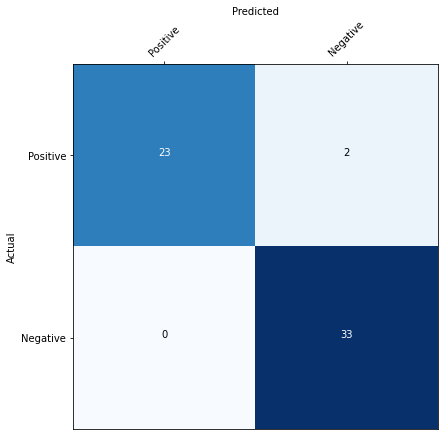

In [ ]:
from utils import plot_confusion_matrix

plot_confusion_matrix(manual_labels = katherine_manual_labels, 
                      sorted_date_df =get_sorted_df_from_file_name(os.path.join(working_dir, 'KatherineJohnson.txt')), #df_sorted
                      normalize    = False,
                      title_names = ['Positive','Negative'])


#### Task 7: Manually calculate the precision of your date expression procedure on KatherineJohnson.txt.




Precision= TP/(TP+FP)=23/(23+0)=1

### Applying the extraction procedure to the unseen MaryJackson.txt
Next, we will test the date extraction procedure and see how it performs on the unseen file MaryJackson.txt. First, let's have a look at the text inside this file: 

In [ ]:
text_mary = read_file(os.path.join(working_dir, 'MaryJackson.txt'))


#### Task 8: Manually label all sentences from mary.txt
Now go through the text in mary.txt and fill the list *mary_manual_labels* just like we previously did for KatherineJohnson.txt: 

In [ ]:
#Create a dataframe for the manual labels
list_mary=sentence_tokenize_text(text_mary)
dates_mary=[]
for sent in list_mary:
    dates_mary.append(re.findall('[0-9]{4}|[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}', sent))
for date in dates_mary:
  if date:
    for i in range(len(date)):
      if re.search("[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}", date[i]):
          date[i]=date_expression_to_iso8601(date[i])
events_mary=[]
for sent in list_mary:
  events_mary.append(sent)
dict_events_mary = {'Dates': dates_mary,'Sentence': events_mary} 
df_mary = pd.DataFrame(dict_events_mary)


In [ ]:

  # Add one dictionary for each sentence here. 
  #{"Dates": [], "Sentence": ""},

mary_manual_labels=df_mary[['Sentence','Dates']].to_dict(orient='records')
mary_manual_labels


[{'Dates': ['1921-04-09', '2005-02-11', '1958'],
  'Sentence': 'Mary Jackson (engineer)\nFrom Wikipedia, the free encyclopedia\n\nMary Jackson (née Winston;[1] April 9, 1921 – February 11, 2005) was an American mathematician and aerospace engineer at the National Advisory Committee for Aeronautics (NACA), which in 1958 was succeeded by the National Aeronautics and Space Administration (NASA).'},
 {'Dates': [],
  'Sentence': 'She worked at Langley Research Center in Hampton, Virginia, for most of her career.'},
 {'Dates': ['1951'],
  'Sentence': 'She started as a computer at the segregated West Area Computing division in 1951.'},
 {'Dates': ['1958'],
  'Sentence': "She took advanced engineering classes and, in 1958, became NASA's first black female engineer."},
 {'Dates': [],
  'Sentence': 'After 34 years at NASA, Jackson had earned the most senior engineering title available.'},
 {'Dates': [],
  'Sentence': 'She realized she could not earn further promotions without becoming a supervis

**Now, let's run your date expression procedure on the unseen text *MaryJackson.txt* and look at the resulting DataFrame.**
 

#### Task 9:  Apply extraction procedure to unseen text
Currently, each of these "adapted" functions just uses the functions from the previous parts.

In [ ]:
def sentence_tokenize_text_adapted(text):
  """
  :param text: An input text, i.e. a string
  :return: A list of strings, where each string is one sentence
  """
  return sentence_tokenize_text(text)


def extract_date_expressions_adapted(sentences):
# """
#   :param sentences: A list of strings, where each string is one sentences
#   :return: A pandas DataFrame with the columns 
#                 "Date" (extracted date expressions as a string)
#                 "Sentence" (sentences from which a date expression was extracted)
#   """
  return extract_date_expressions(sentences)
  

def date_expression_to_iso8601_adapted(date_string):
  """
  :param date_string: A string containing a date expression
  :return: A string containing the date in ISO 8601 format
  """
  return date_expression_to_iso8601(date_string)


def get_sorted_df_from_file_name_adapted(file_name):
  #   """
  # :param file_name: A string containing the full path to a file
  # :return: A pandas DataFrame with the columns "Date", "Sentence" and "ISO" 
  #         (see above), where rows are sorted according to "ISO"
  # """
  return get_sorted_df_from_file_name(file_name)     
df_mary_sorted=get_sorted_df_from_file_name_adapted('MaryJackson.txt')
df_mary_sorted

,Date,Sentence
ISO,,
1921-04-09,"April 9, 1921","Mary Jackson (engineer)\nFrom Wikipedia, the f..."
1921-04-09,"April 9, 1921",[3]\n\nPersonal life\nMary Winston was born on...
1942-01-01,1942,[5]\n\nMary Jackson earned bachelor's degrees ...
1943-01-01,1943,"[11]\n\nBy 1943, she had returned to Hampton, ..."
1944-11-18,"November 18, 1944",[7][8][5]\n\nJackson was married on November 1...
1951-01-01,1951,She started as a computer at the segregated We...
1951-01-01,1951,"In 1951, she became a clerk at the Office of t..."
1951-01-01,1951,"[5][11]\n\nIn 1951, Jackson was recruited by t..."
1953-01-01,1953,"[5]\n\nIn 1953, she accepted an offer to work ..."


#### Task 10: Difficulties  encountered during the development of the time patterns and extracting the timeline. 



I have to check manually carefully to see if I missed any time expression patterns, this requires manual labor effort. When extracting the timeline, to convert all time expressions to ISO format, I only kept the first time expression from the sentences which contain multiple time expressions, which means some time expressions are missing in the "Date" column.
I made no adaptation to the functions for the biography of Mary Jackson because the time expressions are the same to Katherine Johnson's

**Now, we can evaluate your adapted date expression procedure. Let's plot one confusion matrix for each of the text files. **

Confusion matrix for Katherine Johnson:


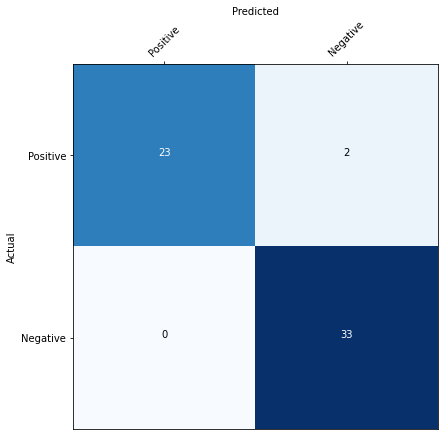

Confusion matrix for Mary Jackson:


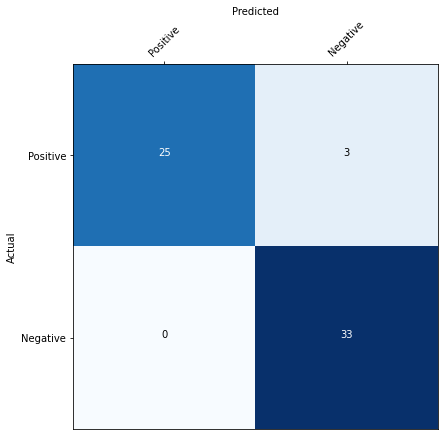

In [ ]:
print('Confusion matrix for Katherine Johnson:')
plot_confusion_matrix(manual_labels = katherine_manual_labels, 
                      sorted_date_df = get_sorted_df_from_file_name(os.path.join(working_dir, 'KatherineJohnson.txt')),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

print('Confusion matrix for Mary Jackson:')
plot_confusion_matrix(manual_labels = mary_manual_labels, 
                      sorted_date_df = get_sorted_df_from_file_name_adapted(os.path.join(working_dir, 'MaryJackson.txt')),
                      normalize    = False,
                      title_names = ['Positive','Negative'])

#### Task 11: Calculate the precision of the adapted date expression procedure on both KatherineJohnson.txt and MaryJackson.txt.





precision for KatherineJohnson.txt: TP/(TP+FP)=23/(23+0)=1

precision for MaryJackson.txt: TP/(TP+FP)=25/(25+0)=1

#### Task 12: Compare the precisions on KatherineJohnson.txt and MaryJackson.txt. Address the following points: 
- Are there any differences? 

No

- If so, where does this difference come from? 

No difference, because the date expression patterns are the same in 2 biographies, the regexes compiled for KatherineJohnson text can be used to track date expressions in MaryJackson text.

- What does this difference mean in terms of generalizability? 

That means my system is able to generalize to unseen text (to MaryJackson text). However, generalizabity to other texts is possible only if the unseen texts have the same date expression patterns as I specified in regex: "[0-9]{4}|[A-Z]{1}[a-z]{1,9} [0-9]{1,2}, [0-9]{4}" for the first text (KatherineJohnson), which includes the date expressions such as 4-digit year (eg. "1990"), or "Month Day, Year" (eg. July 20, 1992). If the unseen texts contain other expression patterns such as "July-20-1992", my regex could not track such expressions. In the short given text (KatherineJohnson), it is possible to screen as many date expression patterns as possible manually. In much longer texts, manual effort required would be intensive, even impossible. Therefore, this kind of manual rule-based system could miss date expression patterns if the unseen texts contain wider range of expressions. In such cases, precision score will be lower for unseen texts.

### Finding matching events
#### Task 13: Find the matching events (i.e. overlapping dates in the two biographical timelines) between the two timelines. 



In [ ]:
katherine_sorted_df=get_sorted_df_from_file_name(os.path.join(working_dir, 'KatherineJohnson.txt'))

mary_sorted_df=get_sorted_df_from_file_name_adapted(os.path.join(working_dir, 'MaryJackson.txt'))
katherine_sorted_df['matching_events']=katherine_sorted_df['Date']
mary_sorted_df['matching_events']=mary_sorted_df['Date']

matching_table=pd.merge(
    katherine_sorted_df,
    mary_sorted_df,
    how="inner",
    on='matching_events', suffixes=('_Katherine', "_Mary"))
matching_table


,Date_Katherine,Sentence_Katherine,matching_events,Date_Mary,Sentence_Mary
0,1953,"The family lived in Newport News, Virginia, fr...",1953,1953,"[5]\n\nIn 1953, she accepted an offer to work ..."
1,1953,Johnson accepted a job offer from the agency i...,1953,1953,"[5]\n\nIn 1953, she accepted an offer to work ..."
2,1953,"[6]\n\nFrom 1953 to 1958, Johnson worked as a ...",1953,1953,"[5]\n\nIn 1953, she accepted an offer to work ..."
3,1956,James died of an inoperable brain tumor in 195...,1956,1956,"[6]\n\nCareer\n\nJackson (first row, far right..."
4,1958,"From 1958 until her retirement in 1986, Johnso...",1958,1958,"She took advanced engineering classes and, in ..."
5,1958,"From 1958 until her retirement in 1986, Johnso...",1958,1958,"After completing the courses, she was promoted..."
6,1958,"""[23]\n\nNACA disbanded the colored computing ...",1958,1958,"She took advanced engineering classes and, in ..."
7,1958,"""[23]\n\nNACA disbanded the colored computing ...",1958,1958,"After completing the courses, she was promoted..."
8,1970,"[1] In 1970, Johnson worked on the Apollo 13 M...",1970,1970,[5] She was noted in the 1970s for helping Afr...
9,2019,the pair were married for 60 years until his d...,2019,2019,"In 2019, Jackson was posthumously awarded the ..."



I used Python code to find matching events, by finding the dates that are the same in two dataframes of KatherineJohnson and MaryJackson.


The list of matching events is stored in variable "list_matching_events" below

In [ ]:
list_matching_events=matching_table['matching_events']

list_matching_events

0   1953-01-01
1   1953-01-01
2   1953-01-01
3   1956-01-01
4   1958-01-01
5   1958-01-01
6   1958-01-01
7   1958-01-01
8   1970-01-01
9   2019-01-01
Name: matching_events, dtype: datetime64[ns]

#### Task 14: Discussion of matching events 
1. Discuss the list of matching events found. 

The list of matching events showed that only dates in the sentences which contains only one date expression can be found as matching. In case one sentence contains multiple date expressions, though one or more of the dates in both text match, they could not be found as matching events. For example, the sentence in MaryJackson.txt "Mary Jackson (née Winston;[1] April 9, 1921 – February 11, 2005) was an American mathematician and aerospace engineer at the National Advisory Committee for Aeronautics (NACA), which in 1958 was succeeded by the National Aeronautics and Space Administration (NASA)." contains multiple time expressions "1921", "2005" and "1958", and the sentence in KatherineJohnson.txt "From 1953 to 1958, Johnson worked as a computer,[21] analyzing topics such as gust alleviation for aircraft." contains multiple time expressions "1953" and "1958". The matching time is 1958, however,  the time expression "1958" could not be found as matching event. 

Meanwhile, some sentences which contain only one time expression such as in MaryJackson.txt: "In 1953, she accepted an offer to work for engineer Kazimierz Czarnecki in the Supersonic Pressure Tunnel."
 and in KatherineJohnson.txt: "The family lived in Newport News, Virginia, from 1953." The time "1953" could be found as matching events. 


2. When going through the texts manually, some matching events could not be found programmatically/automatically?

Yes, as mentioned above, some dates contained in the sentences which hold multiple time expressions could not be found as matching events, though the dates are the same between the two.

3. If so, what could be the reason(s) for this? 

The mechanism of finding matching events is that, the pandas library looks for the cells which contain the same values and join the two dataframes into new one which contains matching values (the same time expressions). For example, in a timeline dataframe, one cell contains expression "1958", the cell of the other dataframe contains also "1958". They are string values. The built-in function considers them as the same string values, so those expressions could be interpreted as matching. However, in some cases, for instance, in KatherineJohnson text, "From 1953 to 1958, Johnson worked as a ..." contains multiple dates such as "1953" and "1958", and in MaryJackson text, "she was promoted to aerospace engineer in 1958" contains "1958" as date expressions, however, 1958 could not be found as matching events here, because right from the start, I could not manage to extract the second expression "1958" into the timeline from the sentence holding multiple date expressions, only "1953" was extracted only. Since the date is missing in the timeline dataframe, the system could not track them. 

This issue is also the difficulty I encountered. I have difficulty in writing up the code/regex which can compile all date expressions from the sentences which hold multiple time expressions. If I try to extract all dates from the sentences containing multiple time expressions, it would be impossible to create a timeline in a dataframe due to different data shapes.